REGULARIZED METHOD FOR REGRESSION -> Cuando tus variables están muy correlacionadas, la regresión lineal “normal” reparte mal los pesos y los coeficientes se vuelven inestables. Si cae una variable, todo el modelo puede venirse abajo.

Coeficiente -> En el contexto de regresión lineal, un coeficiente es, en esencia, un número que mide la fuerza y dirección con que una variable predictora (por ejemplo, “número de habitaciones”) influye en la variable objetivo (por ejemplo, “precio de la casa”).

- RIDGE REGRESION -> ayuda a estabilizar los coeficientes altos, de forma que matematicamente, minimiza todos los coeficientes un poco.


- LEAST SQUARE SHRINKAGE (LASSO) -> al contrario que lo anterior, afecta a los coeficientes muy pequeños, llegando a disminuirles a 0 si no son de mucha ayuda


- ELASTIC NET -> combina los dos metodos anteriores, minimiza los coeficientes muy grandes y elimina los muy pequeños. Es ideal cuando muchas variables estan muy parecidas.Cuando tus variables están muy correlacionadas, la regresión lineal “normal” reparte mal los pesos y los coeficientes se vuelven inestables. Si cae una variable, todo el modelo puede venirse abajo.Cuando tus variables están muy correlacionadas, la regresión lineal “normal” reparte mal los pesos y los coeficientes se vuelven inestables. Si cae una variable, todo el modelo puede venirse abajo.Cuando tus variables están muy correlacionadas, la regresión lineal “normal” reparte mal los pesos y los coeficientes se vuelven inestables. Si cae una variable, todo el modelo puede venirse abajo.Cuando tus variables están muy correlacionadas, la regresión lineal “normal” reparte mal los pesos y los coeficientes se vuelven inestables. Si cae una variable, todo el modelo puede venirse abajo.Cuando tus variables están muy correlacionadas, la regresión lineal “normal” reparte mal los pesos y los coeficientes se vuelven inestables. Si cae una variable, todo el modelo puede venirse abajo.Cuando tus variables están muy correlacionadas, la regresión lineal “normal” reparte mal los pesos y los coeficientes se vuelven inestables. Si cae una variable, todo el modelo puede venirse abajo.Cuando tus variables están muy correlacionadas, la regresión lineal “normal” reparte mal los pesos y los coeficientes se vuelven inestables. Si cae una variable, todo el modelo puede venirse abajo.

OUTLIERS IMPACT

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

LINEAR REGRESION

Coeficiente estimado:  [0.47134857]


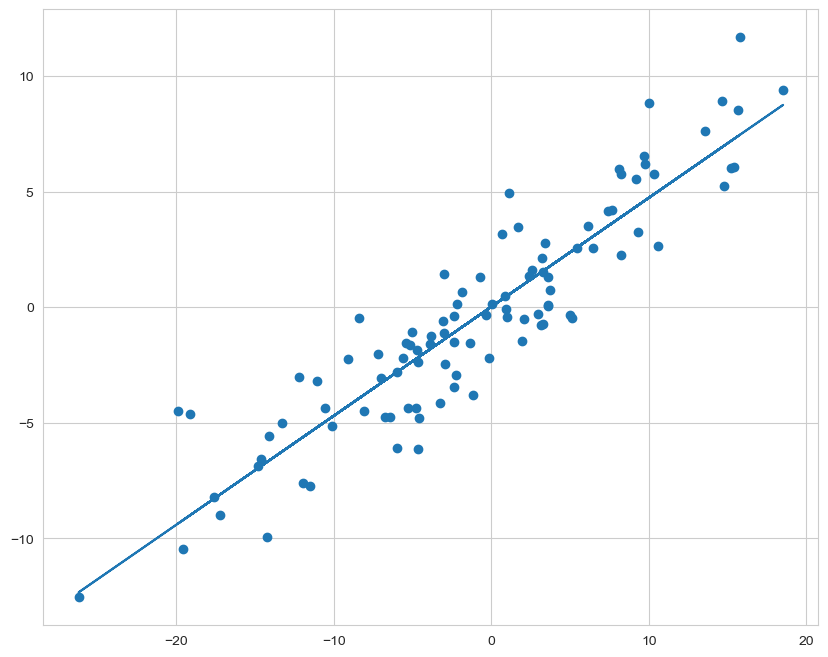

In [16]:
from sklearn.linear_model import LinearRegression
# Fijamos la semilla del generador de numeros aleatorios, de forma que estableciendo esto tendremos siempre los mismos datos
np.random.seed(42)
# Establecemos el numero de puntos que queremos generar (100)
n_samples = 100
# Genera numeros aleatorios cumpliendo los porcentages de una campana de Gauss teniendo el 0 como punto medio, luego se multiplica por 10 el resultado, teniendo un array de 100 datos
rng = np.random.randn(n_samples) * 10
# Generamos los valores de y a partir de x 
    # - 0.5 * rng -> por cada unidad de x, y sube 0,5. Esto seria la linea perfecta
    # - 2 * np.random.randn(n_samples) -> añadimos un toque de desorden a la distribucion de puntos, volviendo a pedir 100 numeros como antes y multiplicando el resultado por 2, que se suma a la linea
        # perfecta anterior haciendo que el punto se desplace en el eje y hacia arriba o hacia abajo
y_gen = 0.5 * rng + 2 * np.random.randn(n_samples)

# Creamos y ajustamos el modelo
lr = LinearRegression()
lr.fit(rng.reshape(-1, 1), y_gen)
# Tenemos un array, asi que para que sklearn lo interprete bien lo pasamos a matriz
model_pred = lr.predict(rng.reshape(-1, 1))

plt.figure(figsize = (10, 8))
plt.scatter(rng, y_gen)
plt.plot(rng, model_pred)
print("Coeficiente estimado: ", lr.coef_)

In [17]:
# Introducimos un valor extremo de y donde x es maximo
idx = rng.argmax()
y_gen[idx] = 200
# Introducimos un valor extremo de y donde x es minimo
idx = rng.argmin()
y_gen[idx] = -200

REGULAR REGRESSION

Coeficiente de prediccion:  [1.50556072]


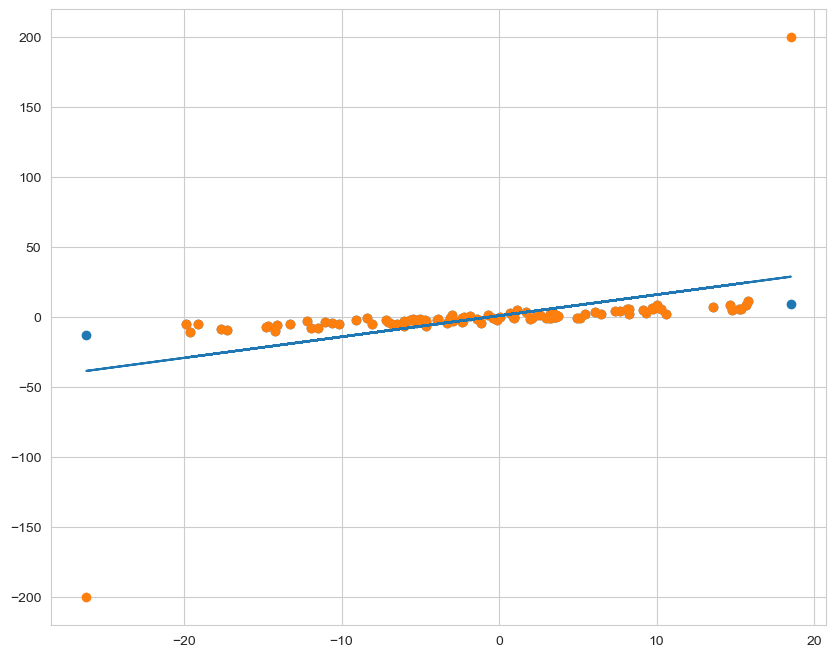

In [18]:
plt.figure(figsize = (10, 8))
plt.scatter(rng, y_reg)

# Creamos y ajustamos el modelo incluyendo los dos outliers que hemos creado
o_lr = LinearRegression()
o_lr.fit(rng.reshape(-1, 1), y_gen)
o_model_pred = o_lr.predict(rng.reshape(-1, 1))

plt.scatter(rng, y_gen)
plt.plot(rng, o_model_pred)
print("Coeficiente de prediccion: ", o_lr.coef_)

RIDGE REGRESION

In [19]:
from sklearn.linear_model import Ridge

Coeficiente de prediccion:  [1.00370714]


C:\Users\PcVIP\anaconda3\envs\ml_python\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


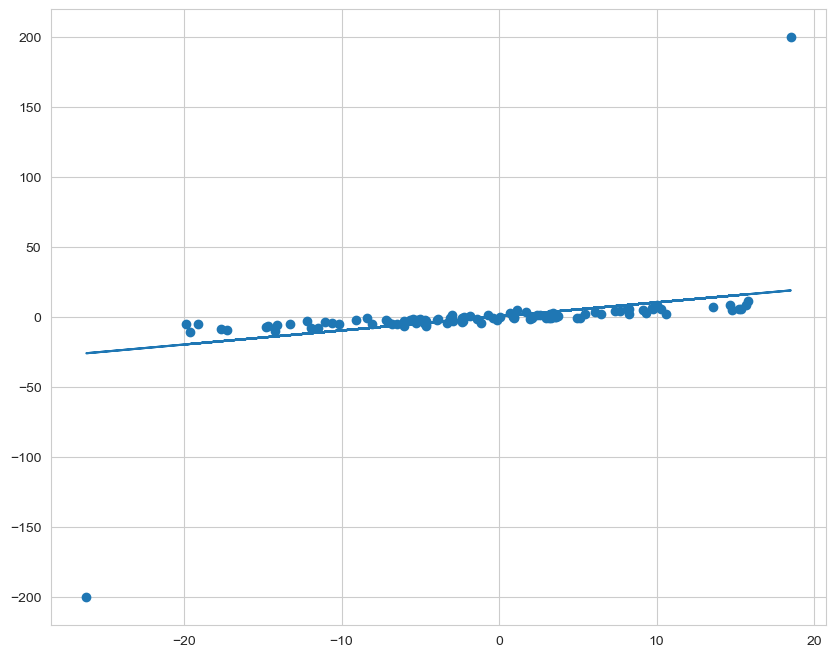

In [21]:
# Creamos el modelo Ridge y le establecemos una fuerza de penalizacion de 0.5 -> cuanto mayor, mas se castiga a los coeficientes grandes
ridge_mod = Ridge(alpha = 0.5, normalize = True)
ridge_mod.fit(rng.reshape(-1, 1), y_gen)
ridge_mod_pred = ridge_mod.predict(rng.reshape(-1, 1))

plt.figure(figsize = (10, 8))
plt.scatter(rng, y_gen)
plt.plot(rng, ridge_mod_pred)
print("Coeficiente de prediccion: ", ridge_mod.coef_)

LASSO

In [22]:
from sklearn.linear_model import Lasso

Coeficiente de prediccion:  [1.06289489]


C:\Users\PcVIP\anaconda3\envs\ml_python\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


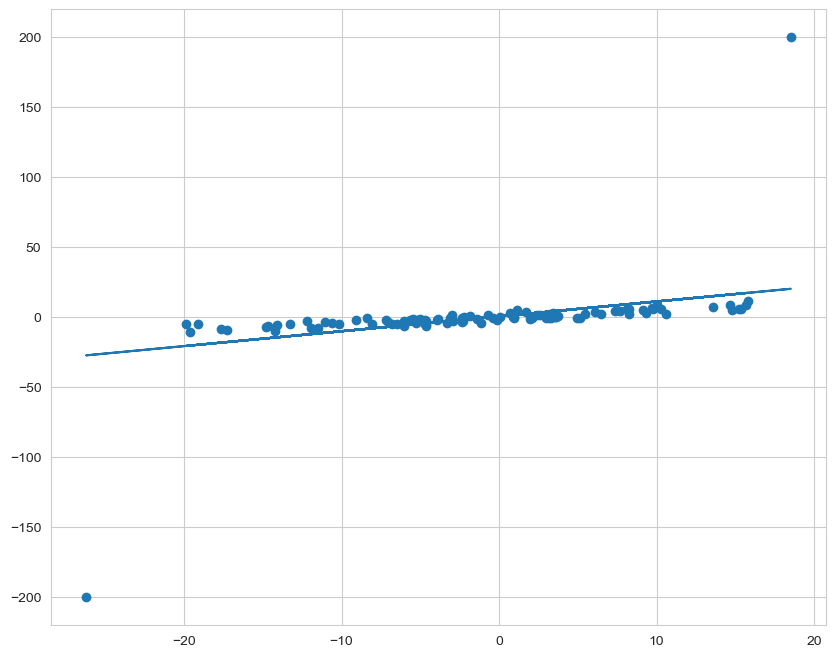

In [23]:
# Creamos el modelo Lasso y controlamos la fuerza de corte de 0.5 -> cuanto mayor, mas 0s obtendremos
lasso_mod = Lasso(alpha = 0.4, normalize = True)
lasso_mod.fit(rng.reshape(-1, 1), y_gen)
lasso_mod_pred = lasso_mod.predict(rng.reshape(-1, 1))

plt.figure(figsize = (10, 8))
plt.scatter(rng, y_gen)
plt.plot(rng, lasso_mod_pred)
print("Coeficiente de prediccion: ", lasso_mod.coef_)

ELASTIC NET REGRESSION

In [24]:
from sklearn.linear_model import ElasticNet

Coeficiente de prediccion:  [0.74724704]


C:\Users\PcVIP\anaconda3\envs\ml_python\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  FutureWarning,


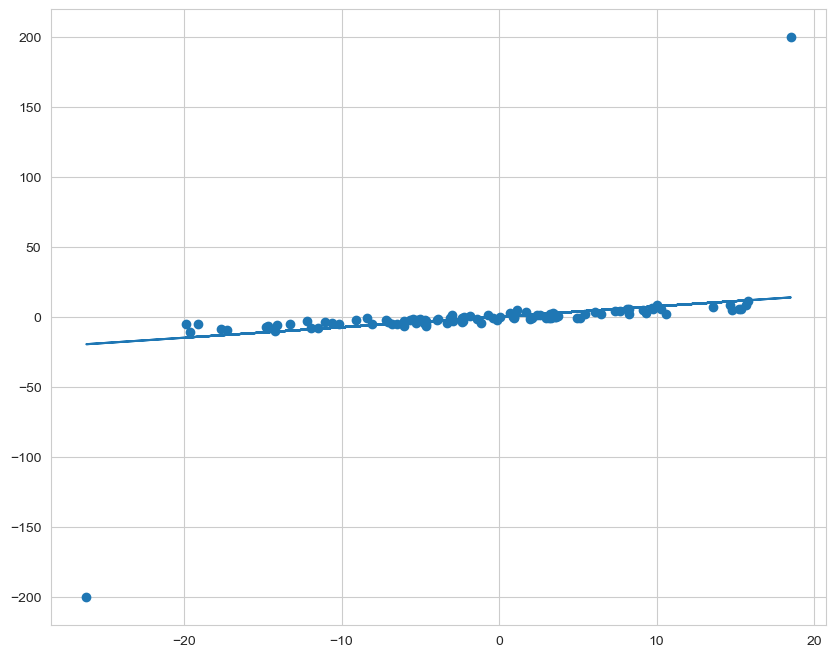

In [25]:
# Creamos el modelo ElasticNet y controlamos fuerza total de la penalización de 0.02 -> cuánto “castigo” pones sobre los coeficientes grandes
    # Alpha controla el equilibrio entre:
        # Ajustar bien (minimizar los errores en tus datos).
        # Mantener los coeficientes pequeños (evitar que sean erráticos o inflados).
en_mod = ElasticNet(alpha = 0.02, normalize = True)
en_mod.fit(rng.reshape(-1, 1), y_gen)
en_mod_pred = en_mod.predict(rng.reshape(-1, 1))

plt.figure(figsize = (10, 8))
plt.scatter(rng, y_gen)
plt.plot(rng, en_mod_pred)
print("Coeficiente de prediccion: ", en_mod.coef_)